# How does a simple model behave?

To improve my intuition for how the fitness model behaves, I decided to generate some sample data and visualize their predicted frequency values using fixed beta values for a single predictor.
To do this, I need to have a sample of viruses that each have an assigned fitness predictor value.
Then I need to select a range of possible beta values to use.
Finally, I need to generate the predicted frequencies from the model with each beta value using the strain predictor values.

This approach requires a lot of assumptions and it might be easier to just start with a comparison of how beta values alter the predicted growth of a single virus across a range of plausible frequencies.
Viruses can range in frequency from 0.01 to 0.05.
Beta values can range from -2 to 2.

## Visualize the effects of beta values on a single virus

In [23]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

In [84]:
# Configure matplotlib theme.
sns.set_style("ticks")
fontsize = 14
matplotlib_params = {
    'axes.labelsize': fontsize,
    'font.size': fontsize,
    'legend.fontsize': 12,
    'xtick.labelsize': fontsize,
    'ytick.labelsize': fontsize,
    'text.usetex': False,
    'figure.figsize': [6, 4],
    'savefig.dpi': 300,
    'figure.dpi': 120,
    'text.usetex': False
}

plt.rcParams.update(matplotlib_params)

# Turn off spines for all plots.
plt.rc("axes.spines", top=False, right=False)

Viruses can range in frequency from 0.01 to 0.05. Beta values can range from -2 to 2.

In [85]:
frequency = np.arange(0.01, 0.06, 0.01)
beta = np.arange(-2, 3, 1)

In [86]:
frequency

array([ 0.01,  0.02,  0.03,  0.04,  0.05])

In [87]:
beta

array([-2, -1,  0,  1,  2])

The growth formula is just:

$$
x_{i}(t + \Delta{t}) = x_{i}(t)\exp(\beta{f_{i}})
$$

For the purpose of this exercise, let's assume the fitness value for this virus, $f_{i}$, is standardized such that its mean is zero.
We also want to see how the model behaves for a range of these values.

In [88]:
fitness = np.arange(-1, 2, 1)

In [89]:
fitness

array([-1,  0,  1])

In [90]:
df = pd.DataFrame(list(itertools.product(frequencies, beta, fitness)), columns=["frequency", "beta", "fitness"])

In [91]:
df.head()

,frequency,beta,fitness
0,0.01,-2,-1
1,0.01,-2,0
2,0.01,-2,1
3,0.01,-1,-1
4,0.01,-1,0


Calculate the expected growth for each combination of values represented by a row in the data frame.

In [92]:
df["projected_frequency"] = df.apply(lambda record: record["frequency"] * np.exp(record["beta"] * record["fitness"]), axis=1)

Plot the resulting expected frequency by the corresponding initial frequency.
Facet the results by the beta and fitness values.

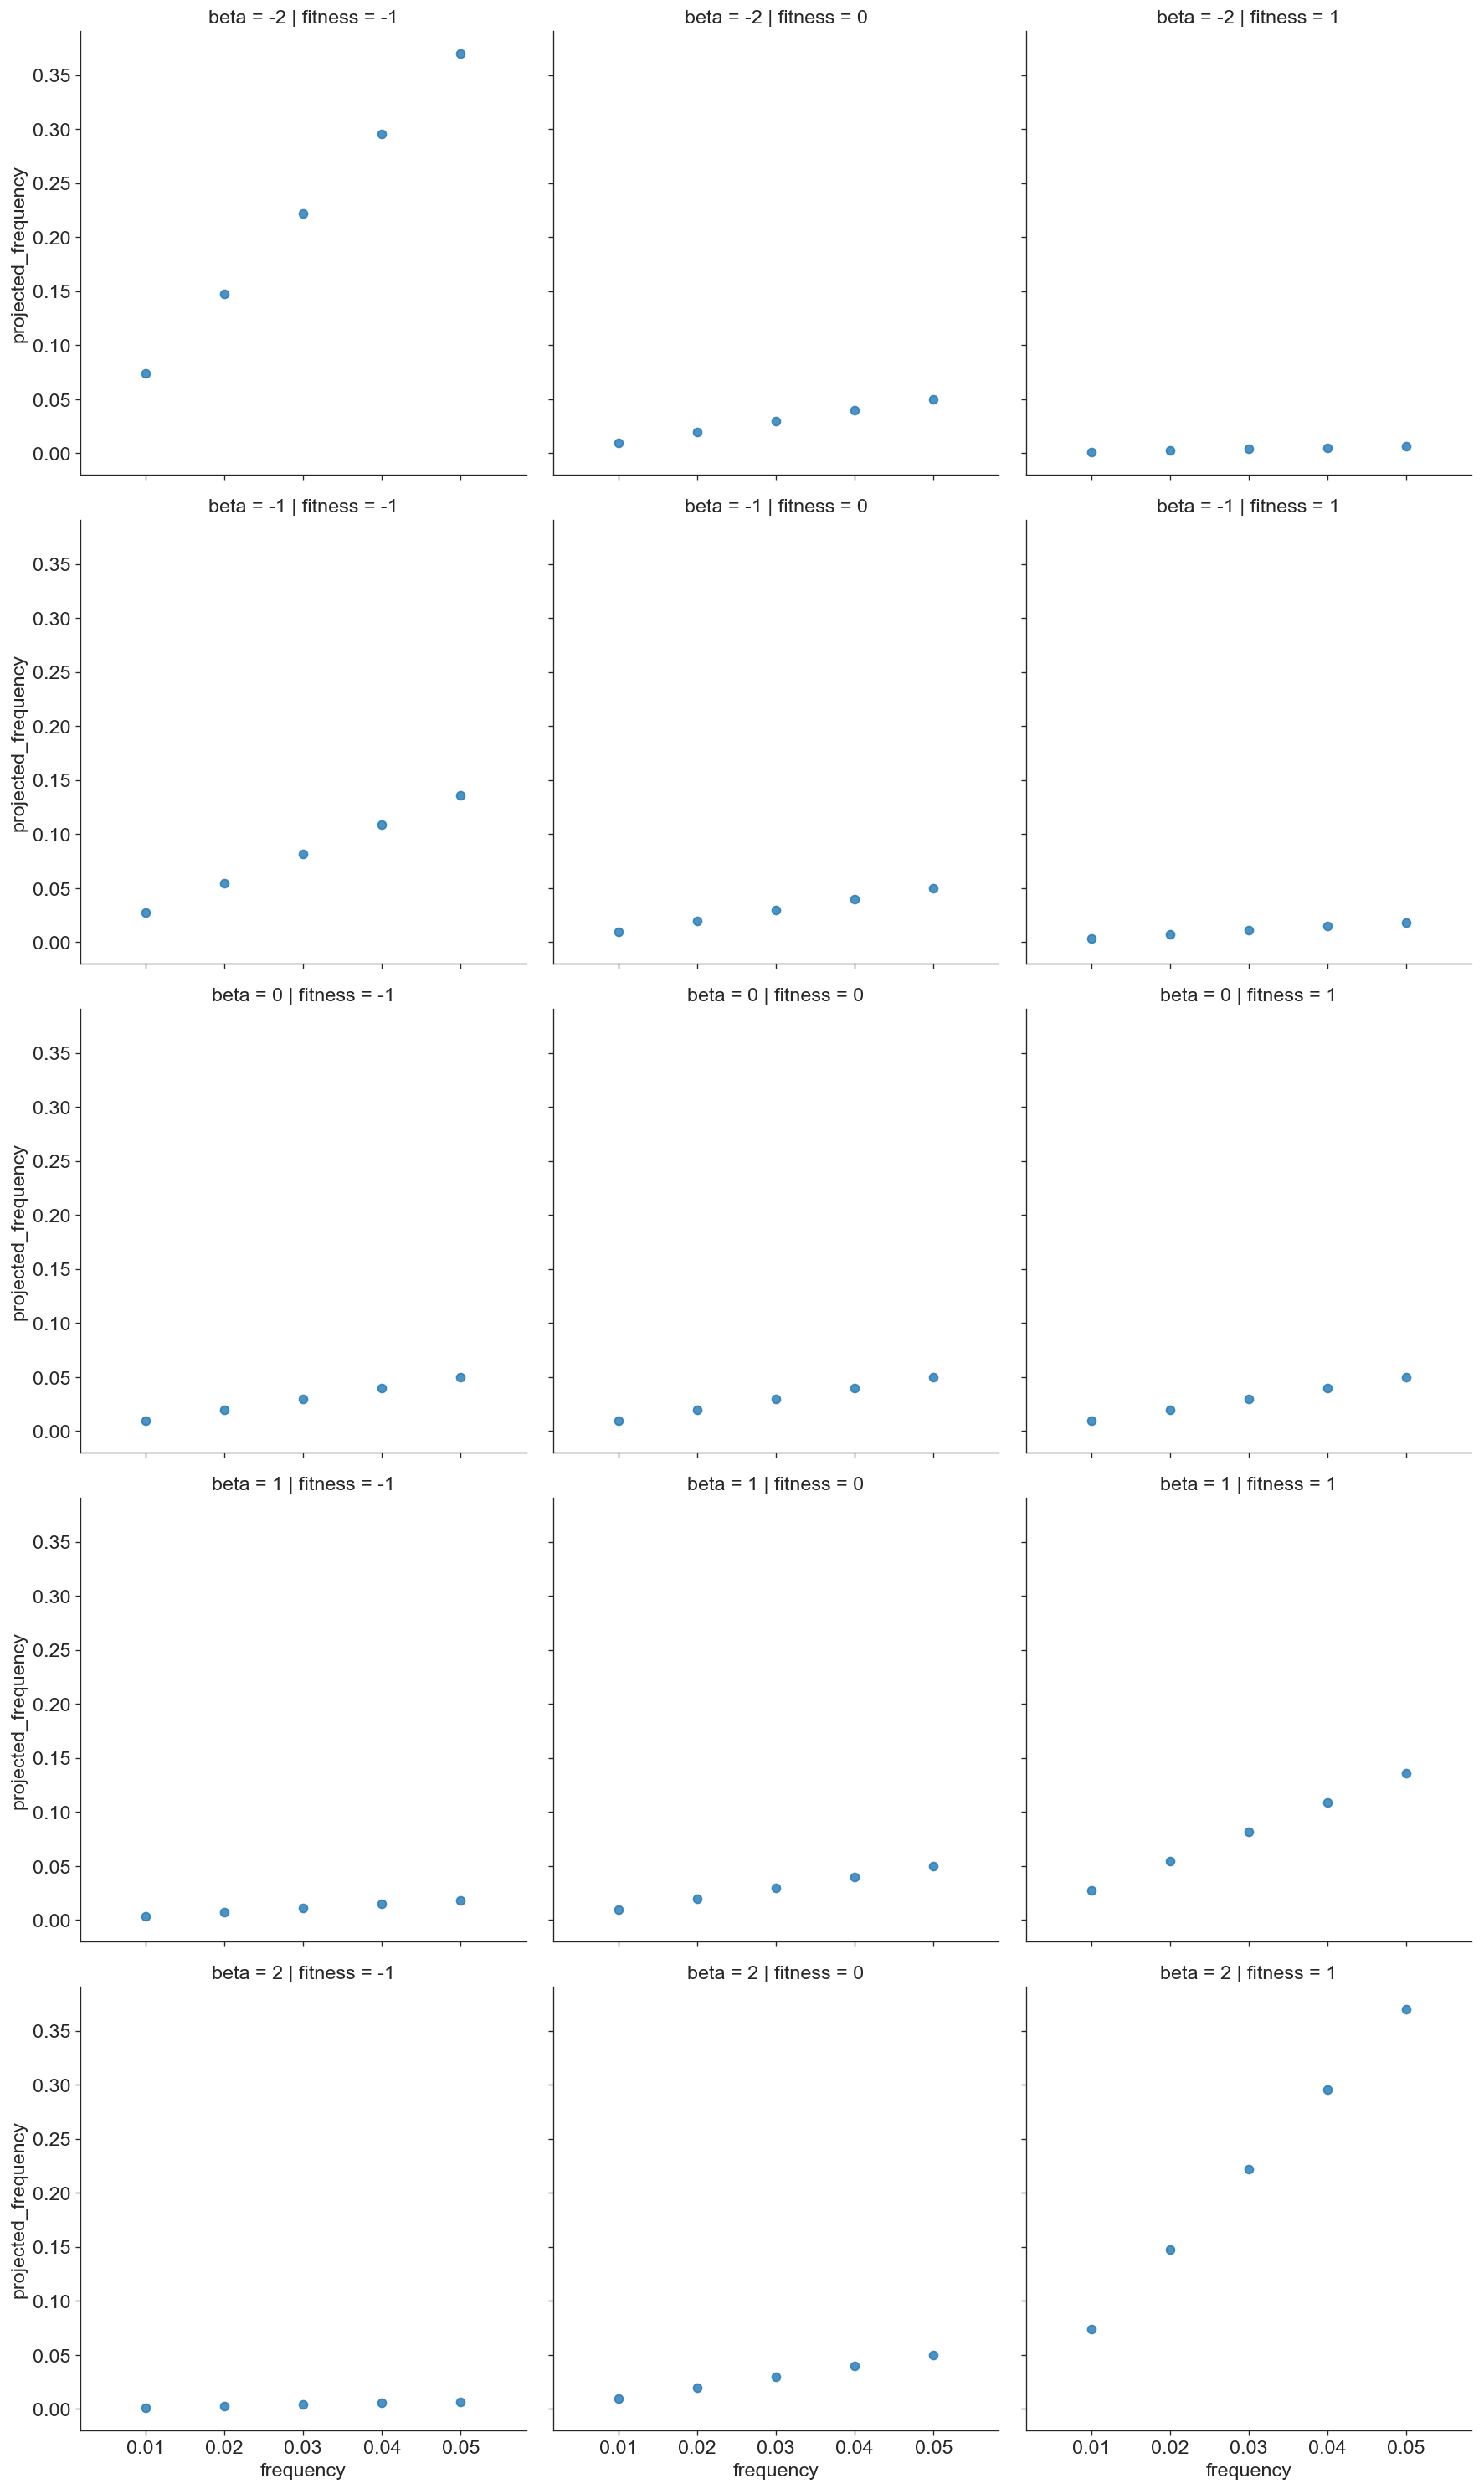

In [93]:
sns.lmplot(
    "frequency",
    "projected_frequency",
    df,
    row="beta",
    col="fitness",
    fit_reg=False
)

Another way to visualize the same results would be to plot a line with expected frequency on the y axis, fitness on the x axis, and different colors for each beta.

In [94]:
beta = np.arange(0, 2.5, 0.5)
fitness = np.arange(-1, 1.1, 0.1)

In [95]:
df = pd.DataFrame(list(itertools.product(frequencies, beta, fitness)), columns=["frequency", "beta", "fitness"])
df["projected_frequency"] = df.apply(lambda record: record["frequency"] * np.exp(record["beta"] * record["fitness"]), axis=1)

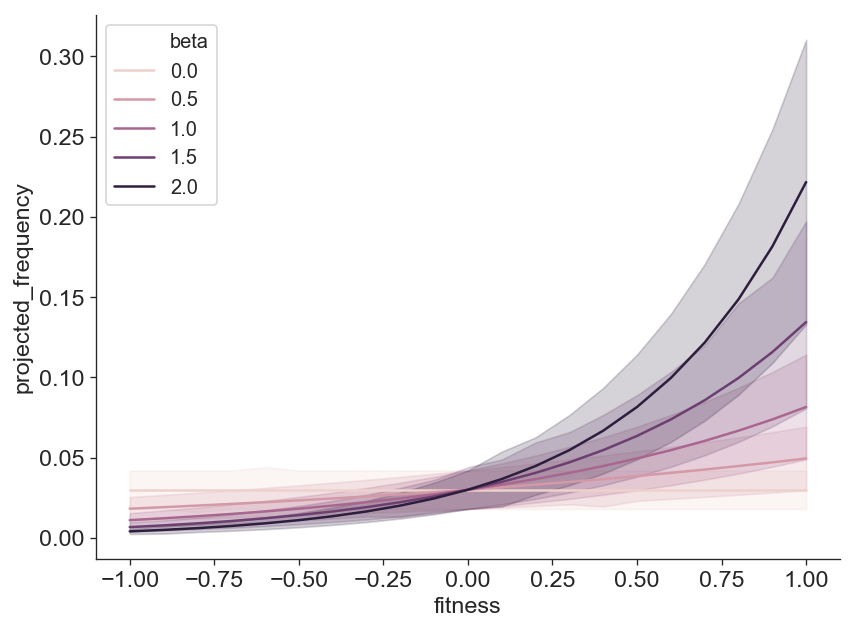

In [96]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.lineplot(
    x="fitness",
    y="projected_frequency",
    data=df,
    hue="beta",
    ax=ax,
    legend="full"
)

Plot the change in frequency by fitness and beta values.

In [97]:
df["delta_frequency"] = df["projected_frequency"] - df["frequency"]

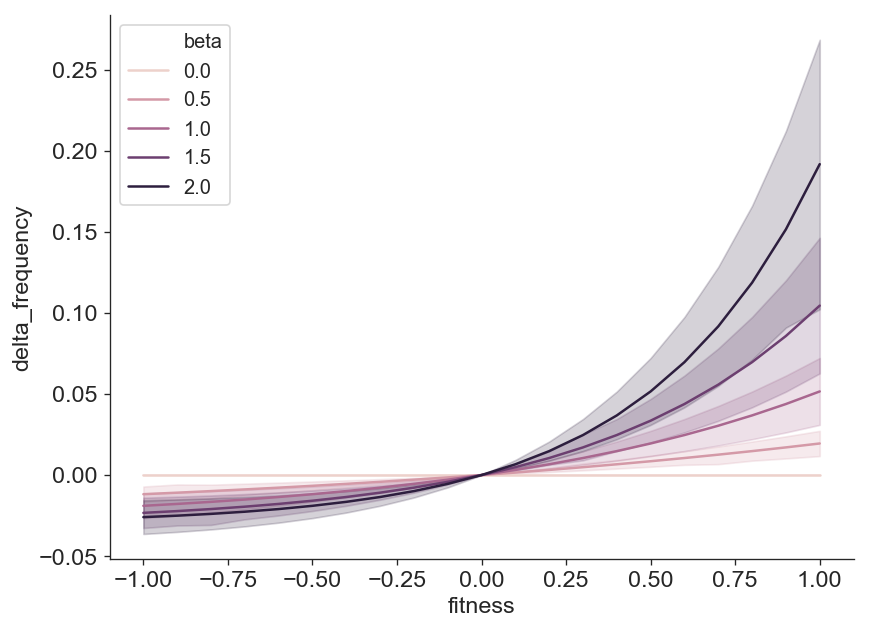

In [98]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.lineplot(
    x="fitness",
    y="delta_frequency",
    data=df,
    hue="beta",
    ax=ax,
    legend="full"
)